# Problem Set 5 

Alisha Jones 

Skin Color Discrimination

April 22, 2020

### 1. Develop hypotheses involving a muli-item scale as either a dependent variable (DV) or independent variable (IV) [1 pt]

Do the following when you write your hypothesis:

    A. Write a couple sentences about the theoretical reasons (prior knowledge / research) for why you think that multiple dependent or independent variables of interest are correlated with eachother in one or more groupings
    
    B. Tell us a 1-word variable name that you will assign to each multi-item scale that you think could well represent your potentially correlated variables. The 1-word variable names should reflect your theory in response to prompt A above.
    
    C. State the predicted direction of association between your dependent variable DV (multi-item scales or otherwise) and independent variables (IVs) (multi-item scales or otherwise) in your proposed model. You can predict no relationship if you do not expect a relationship.

In [1]:
clear 
set more off 
capture log close using problemset5log.log 
use C8 C8A C8B C9 B3 B16A B16B B16C B16D B17A B17B B17C B18 using "20240-0003-Data.dta", clear





(Collaborative Psychiatric Epidemiology Surveys (CPES), 2001-2003 [United States])


### 2. Estimate a correlation matrix [1 pt]

    A. The matrix should include at least 4 independent or dependent variables (but not both) that you want to include in your multi-item scales 
    B. Make a list in this markdown cell that categorizes each potential correlation as strong or weak
    C. Standardize the 4 variables so that they are all positively correlated

In [ ]:
A. My overall theory is that individuals who tend to be more religious will also report that they have better overall health. I feel like religion may be associated with lower overall health due to the fact the more religious someone may be the less likely they will be to depend on spirtual healing. I also believe that the way that religion is practiced could also be important. The more physical interactions with religion could be more religous than those who practice at more from a distance. 

I think that my multiple variables measuring religiousness are related because they represent different ways of getting to how religious someone is. Although these variables are asking about different aspects of religion it is ultimately trying to get at the same thing.

B.
I will be using the names physical and distant to represnt my correlated variables. 

C. 
I predict that health will be negatively impacted by being more religious or more by physical interactions. 


In [2]:
** A. 

pwcorr B3 B16A B16B B16C, sig star(.05)


             |       B3     B16A     B16B     B16C
-------------+------------------------------------
          B3 |   1.0000 
             |
             |
        B16A |   0.5281*  1.0000 
             |   0.0000
             |
        B16B |   0.3218*  0.4509*  1.0000 
             |   0.0000   0.0000
             |
        B16C |   0.3556*  0.4058*  0.5117*  1.0000 
             |   0.0000   0.0000   0.0000
             |


### 3. Estimate factor loadings [1 pt]

    A. Estimate factor loadings for the variables you propose including in your multi-item scale(s)
    B. Rotate and plot the factor loadings
    C. Do the factor loadings support your hypothesis that multiple items should be grouped into a scale?
    D. Do the factor loadings suggest any proposed items should not be included in your scale? Or that an additional scale is in order?


(obs=5,575)

Factor analysis/correlation                      Number of obs    =      5,575
    Method: principal factors                    Retained factors =          2
    Rotation: (unrotated)                        Number of params =          6

    --------------------------------------------------------------------------
         Factor  |   Eigenvalue   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      1.56794      1.47793            1.2341       1.2341
        Factor2  |      0.09001      0.24620            0.0708       1.3049
        Factor3  |     -0.15619      0.07505           -0.1229       1.1820
        Factor4  |     -0.23124            .           -0.1820       1.0000
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(6)  = 4949.67 Prob>chi2 = 0.0000

Factor loadings (pattern matrix) and unique varianc

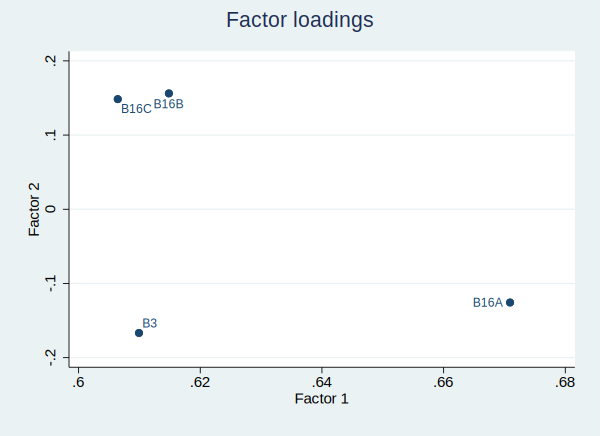

In [3]:
** A. 

factor B3 B16A B16B B16C
loadingplot, norotated




Factor analysis/correlation                      Number of obs    =      5,575
    Method: principal factors                    Retained factors =          2
    Rotation: orthogonal varimax (Kaiser off)    Number of params =          6

    --------------------------------------------------------------------------
         Factor  |     Variance   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      0.90058      0.14320            0.7088       0.7088
        Factor2  |      0.75737            .            0.5961       1.3049
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(6)  = 4949.67 Prob>chi2 = 0.0000

Rotated factor loadings (pattern matrix) and unique variances

    -------------------------------------------------
        Variable |  Factor1   Factor2 |   Uniqueness 
    -------------+--------------------+----

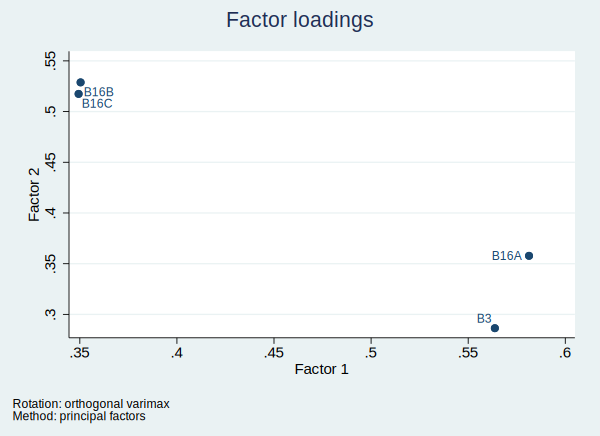

In [4]:
** B. 

quietly factor B3 B16A B16B B16C
rotate, varimax
loadingplot

### 4. Calculate the scales and test them in a regression model [1 pt]

    A. Generate new scale variables that average all the items in eacj scale.
    B. Standardize each scale to be 0-1
    C. Estimate separate models that regress your dependent variables on your independent variables 1) using the scale variables, and 2) using the separate component items of the scale variables
    D. Output your models (at least 2 models) using esttab so we can easily compare results

In [5]:
** A. 
generate physical=(B3+B16A)/2 
generate distant=(B16B+B16C)/2  


(504 missing values generated)

(6 missing values generated)


In [6]:
** B. 

generate health=(C8+C8B)/2

(191 missing values generated)


In [7]:
** C. 

quietly eststo: regress health physical, ro
quietly eststo: regress health distant, ro 

In [9]:
%html

esttab ///
, cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
legend starlevels(^ .1 * .05 ** .01 *** .001) html ///
mlabels("health") ///
collabels(none) keep(physical distant)

This front-end or document format cannot display HTML

In [9]:
quietly eststo: regress C8 physical distant, ro
quietly eststo: regress C8B distant physical, ro 

In [10]:
%html

esttab ///
, cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
legend starlevels(^ .1 * .05 ** .01 *** .001) html ///
mlabels("C8" "C8B") ///
collabels(none) keep(physical distant)

This front-end or document format cannot display HTML

### 5. Interpret your regression estimates [1 pt]

    A. Which of your hypotheses were supported or rejected?
    B. Were the coefficients using your multi-item scales in the same direction as the coefficients for their component variables?
    C. Were the coefficients larger or more statistically significant when you used multi-item scales?

In [ ]:
A. 
All of my hypothesis were rejected. 

B. 
The coefficients seem to be going in different directions. 

C. 
The coefficients became less statistically significant when I used multi-item scales. 